<h1> Revenue Data and Building a Dashboard

In [ ]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [22]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [23]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [24]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


<h2> Question 1: Use yfinance to Extract Stock Data

Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [ ]:
!pip install yfinance
import yfinance as yf
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [29]:
tesla_data = tesla.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [30]:
tesla_data.reset_index(inplace=True)
print (tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [31]:
import requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`. Make sure to use the `html_data` with the content parameter as follow `html_data.content` .


In [32]:
!pip install beautifulsoup4 html5lib
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


In [34]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text
soup = BeautifulSoup(html_data, 'html.parser')
tables = soup.find_all('table')
relevant_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        relevant_table = table
        break
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
if relevant_table:
    rows = []
    for row in relevant_table.find_all('tr')[1:]: 
        cols = row.find_all('td')
        if len(cols) >= 2:  
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            revenue = revenue.replace('$', '').replace(',', '').strip()  
            rows.append({"Date": date, "Revenue": revenue})
    tesla_revenue = pd.DataFrame(rows)
print(tesla_revenue.head())

         Date Revenue
0  2022-09-30   21454
1  2022-06-30   16934
2  2022-03-31   18756
3  2021-12-31   17719
4  2021-09-30   13757


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [35]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

Execute the following lines to remove an null or empty strings in the Revenue column.


In [36]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [37]:
print (tesla_revenue.tail())

          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [38]:
gamestop = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [41]:
gme_data =gamestop.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [42]:
gme_data.reset_index(inplace=True)
print (gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [82]:
import requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [83]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data_2, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


In [88]:
import pandas as pd

# Use the read_html function to extract all tables from the HTML data
tables = pd.read_html(html_data_2)

# Extract the relevant table for GameStop Revenue
gme_revenue = tables[1]  # Adjust the index if needed

# Display the column names to check their structure
print(gme_revenue.columns)

# Clean the column names by stripping whitespace
gme_revenue.columns = gme_revenue.columns.str.strip()

# Check the cleaned column names
print(gme_revenue.columns)

# Now clean the Revenue column by removing dollar signs and commas
if 'Revenue' in gme_revenue.columns:
    gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Display the cleaned DataFrame
print(gme_revenue.head())

Index(['GameStop Quarterly Revenue (Millions of US $)', 'GameStop Quarterly Revenue (Millions of US $).1'], dtype='object')
Index(['GameStop Quarterly Revenue (Millions of US $)', 'GameStop Quarterly Revenue (Millions of US $).1'], dtype='object')
  GameStop Quarterly Revenue (Millions of US $)  \
0                                    2020-04-30   
1                                    2020-01-31   
2                                    2019-10-31   
3                                    2019-07-31   
4                                    2019-04-30   

  GameStop Quarterly Revenue (Millions of US $).1  
0                                          $1,021  
1                                          $2,194  
2                                          $1,439  
3                                          $1,286  
4                                          $1,548  


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [89]:
print (gme_revenue.tail())

   GameStop Quarterly Revenue (Millions of US $)  \
57                                    2006-01-31   
58                                    2005-10-31   
59                                    2005-07-31   
60                                    2005-04-30   
61                                    2005-01-31   

   GameStop Quarterly Revenue (Millions of US $).1  
57                                          $1,667  
58                                            $534  
59                                            $416  
60                                            $475  
61                                            $709  


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


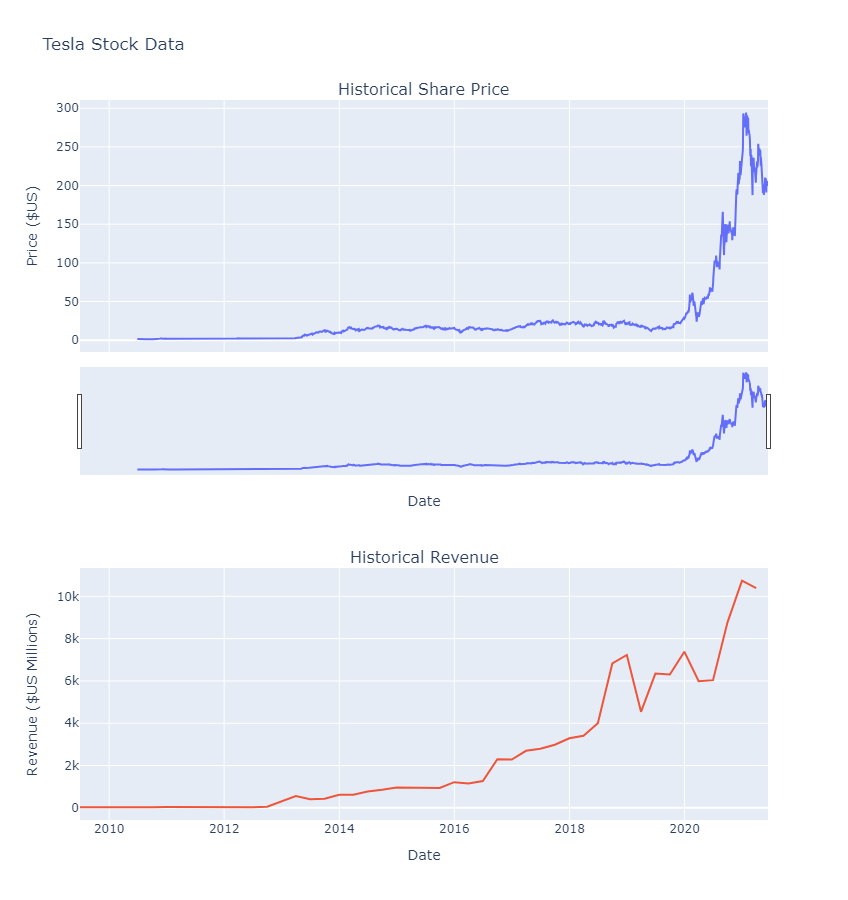

In [93]:
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Data')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


GameStop Stock Data Columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')
GameStop Revenue Data Columns: Index(['Date', 'Revenue'], dtype='object')


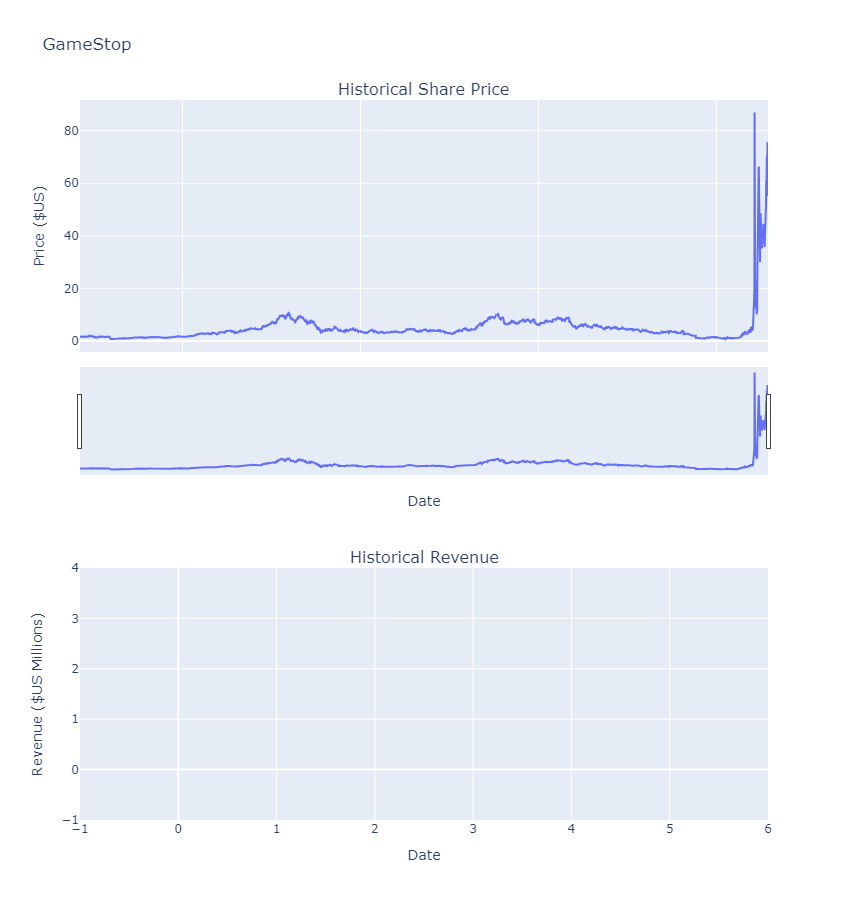

In [98]:
print("GameStop Stock Data Columns:", gme_data.columns)
print("GameStop Revenue Data Columns:", gme_revenue.columns)
gme_revenue.columns = ['Date', 'Revenue']
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
make_graph(gme_data, gme_revenue, 'GameStop')